In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento del dataset
df = pd.read_csv("datasets/insurance.csv")

# Imposta uno stile più moderno per le visualizzazioni
sns.set(style="whitegrid", palette="pastel")

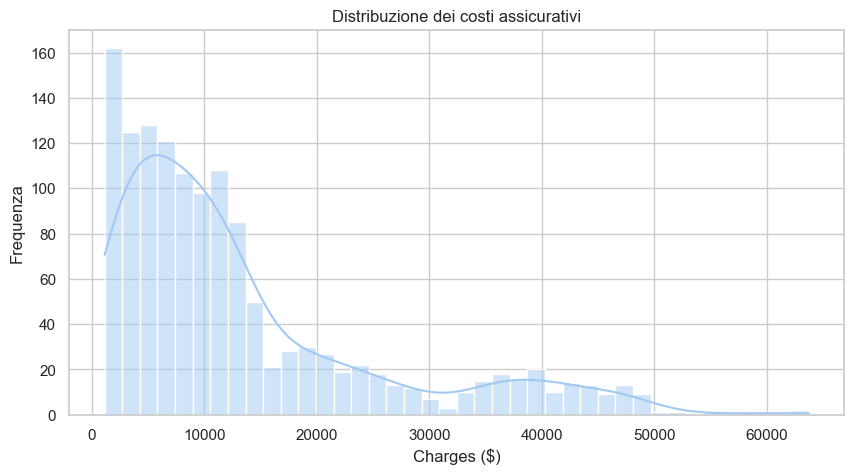

In [2]:
plt.figure(figsize=(10, 5))
sns.histplot(df['charges'], kde=True, bins=40)
plt.title("Distribuzione dei costi assicurativi")
plt.xlabel("Charges ($)")
plt.ylabel("Frequenza")
plt.show()

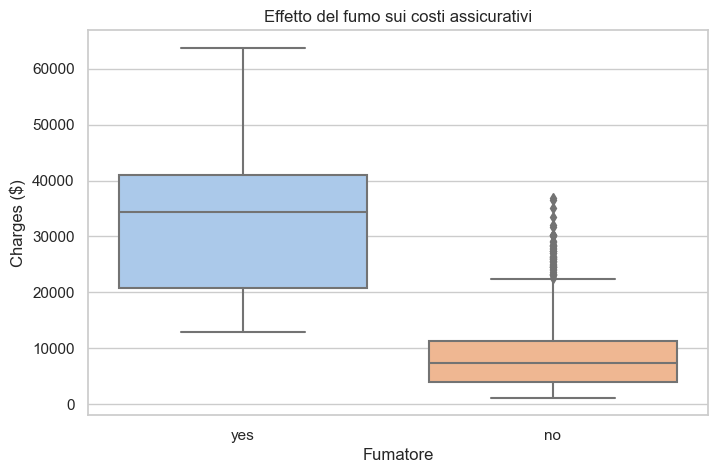

In [3]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Effetto del fumo sui costi assicurativi")
plt.xlabel("Fumatore")
plt.ylabel("Charges ($)")
plt.show()

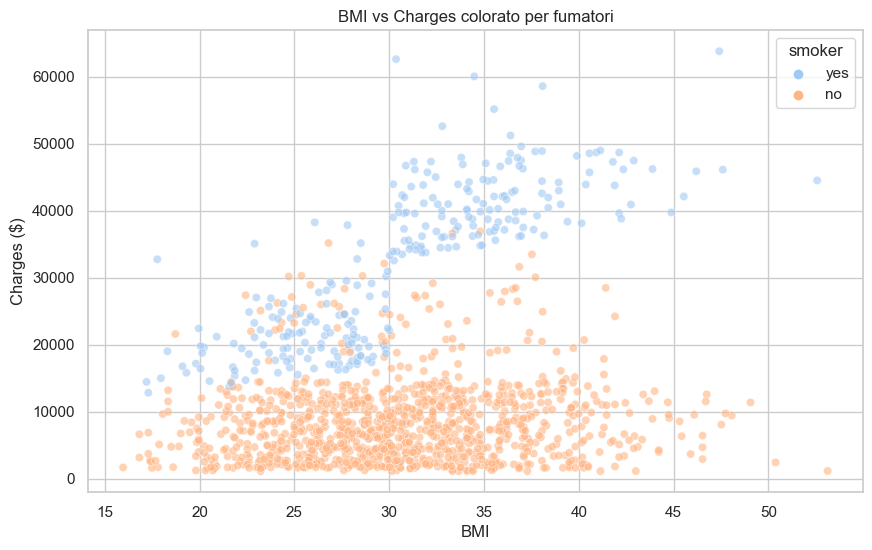

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.6)
plt.title("BMI vs Charges colorato per fumatori")
plt.xlabel("BMI")
plt.ylabel("Charges ($)")
plt.show()

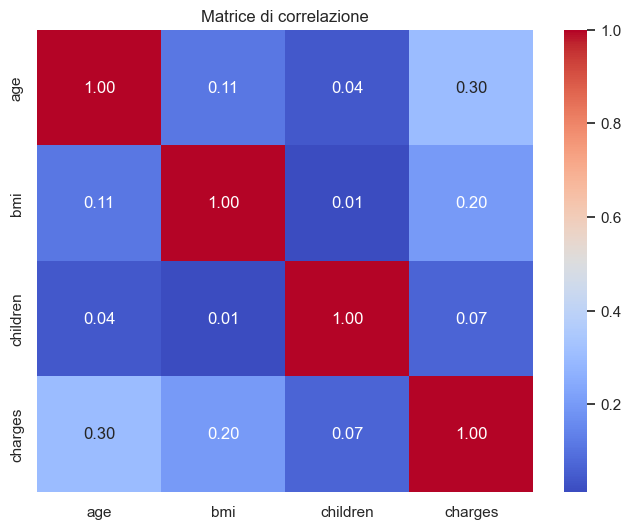

In [5]:
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice di correlazione")
plt.show()

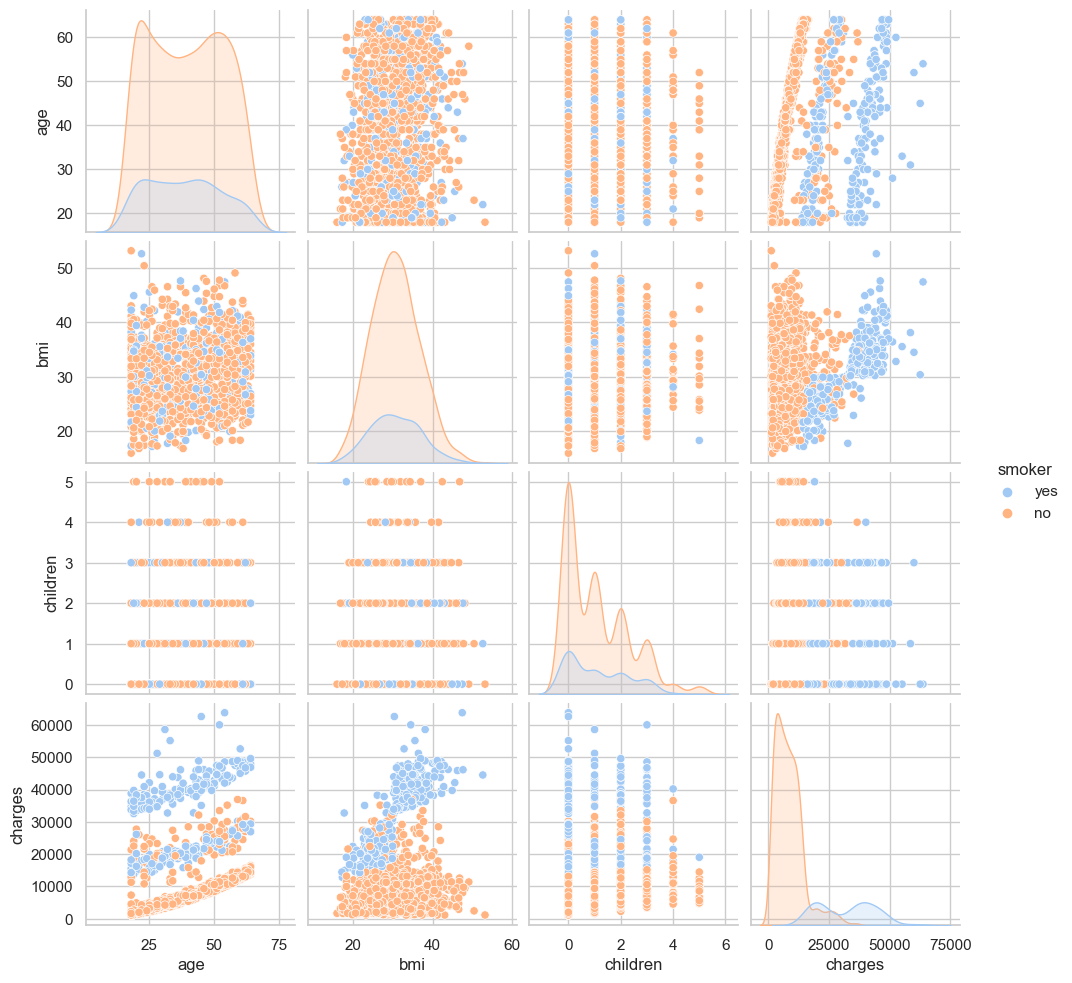

In [7]:
sns.pairplot(df,hue='smoker')

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

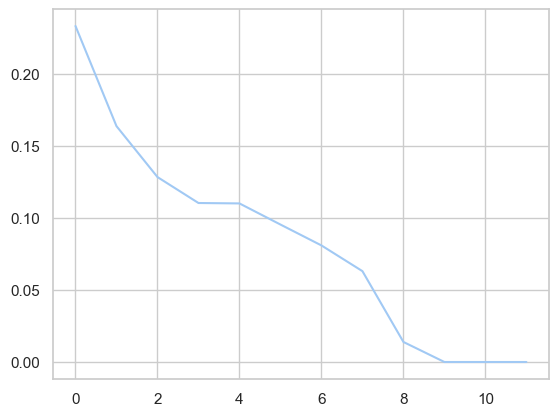

In [23]:
pca = PCA()
scaler = StandardScaler()
scaler.fit(pd.get_dummies(df))
scaled_df = scaler.transform(pd.get_dummies(df))
pca.fit(scaled_df)

plt.plot(pca.explained_variance_ratio_)
plt.show()

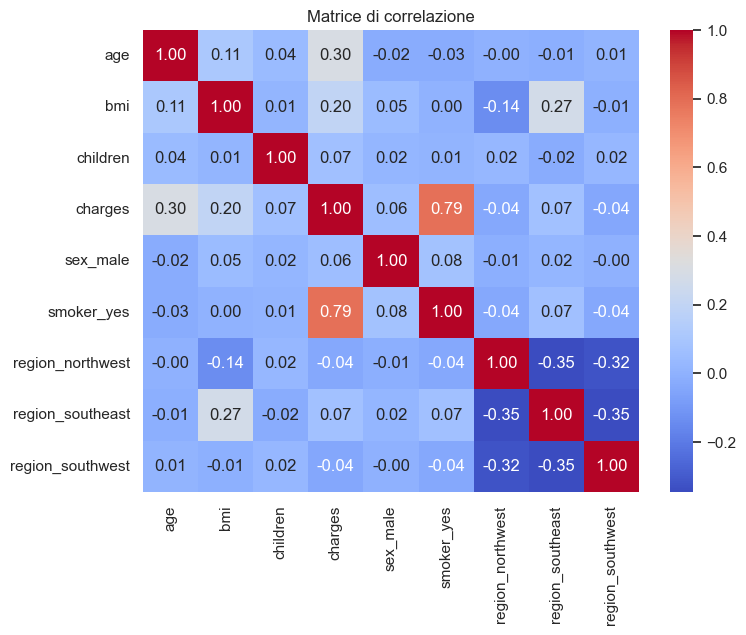

In [7]:
plt.figure(figsize=(8, 6))
numeric_df = pd.get_dummies(df, drop_first=True)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice di correlazione")
plt.show()

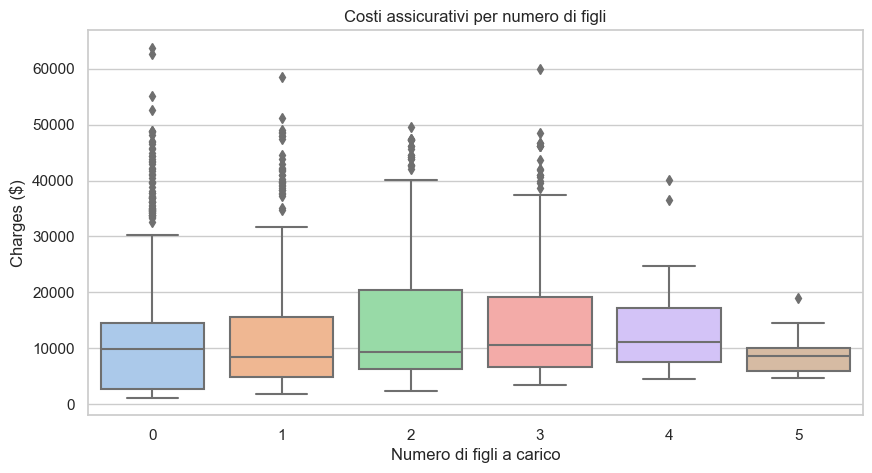

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='children', y='charges', data=df)
plt.title("Costi assicurativi per numero di figli")
plt.xlabel("Numero di figli a carico")
plt.ylabel("Charges ($)")
plt.show()

In [9]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
model = ElasticNet()
X_train, X_test, y_train, y_test = train_test_split(numeric_df.drop('charges', axis=1), df['charges'])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

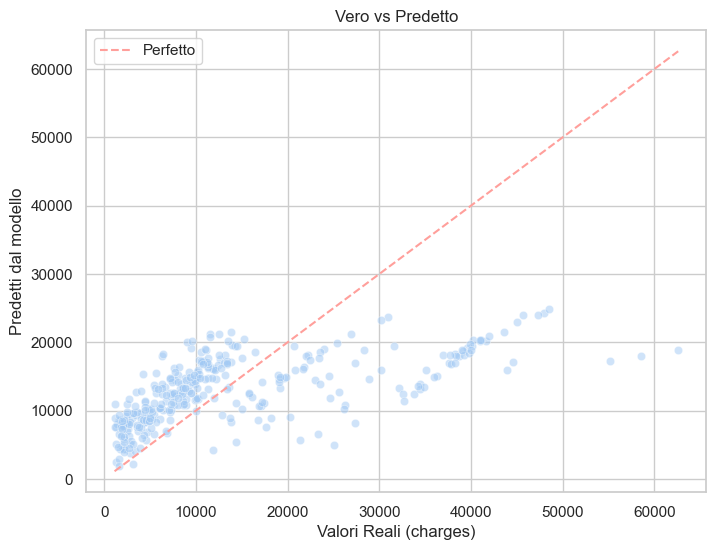

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfetto")
plt.xlabel("Valori Reali (charges)")
plt.ylabel("Predetti dal modello")
plt.title("Vero vs Predetto")
plt.legend()
plt.show()

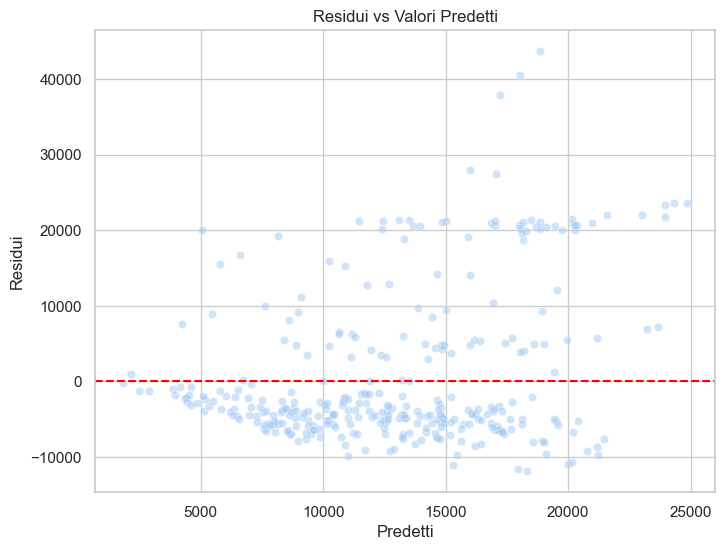

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predetti")
plt.ylabel("Residui")
plt.title("Residui vs Valori Predetti")
plt.show()

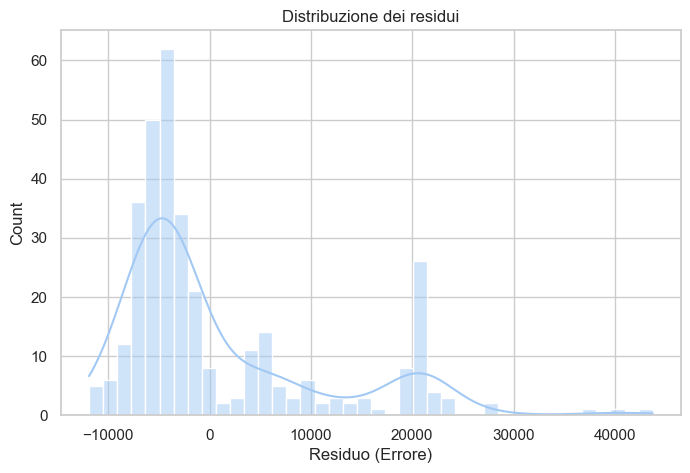

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40)
plt.title("Distribuzione dei residui")
plt.xlabel("Residuo (Errore)")
plt.show()